<a href="https://colab.research.google.com/github/mehatas/KNN_classifier/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

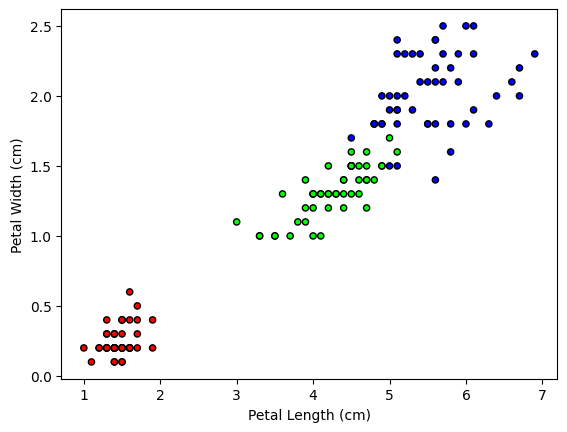

[1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1]
accuracy: 0.9333333333333333


In [62]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## oklid uzaklığını bulmamizi saglayan fonksiyon
def oklid_uzakligi(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # Verilen giriş vektörü ile eğitim veri setindeki her bir örnek arasındaki Öklid uzaklıklarını hesapla
        distances = [oklid_uzakligi(x, x_train) for x_train in self.X_train]
        # Hesaplanan uzaklıkları küçükten büyüğe sırala ve en küçük k uzaklığı içeren indisleri al
        k_indices = np.argsort(distances)[:self.k]
        # En yakın k komşunun etiketlerini al
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # En sık geçen etiketi bul
        most_common = Counter(k_nearest_labels).most_common()
        # En sık geçen etiketi döndür("setosa": 0, "versicolor": 1, "virginica": 2)
        return most_common[0][0]

# Veri yükleme ve bölme
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=134)
print(X)
# Görselleştirme
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# KNN modeli oluşturma ve eğitme
clf = KNN(k=5)
clf.fit(X_train, y_train)

# Tahminler yapma
predictions = clf.predict(X_test)
print(predictions)

# Doğruluk hesaplama
acc = np.sum(predictions == y_test) / len(y_test)
print(f"accuracy: {acc}")


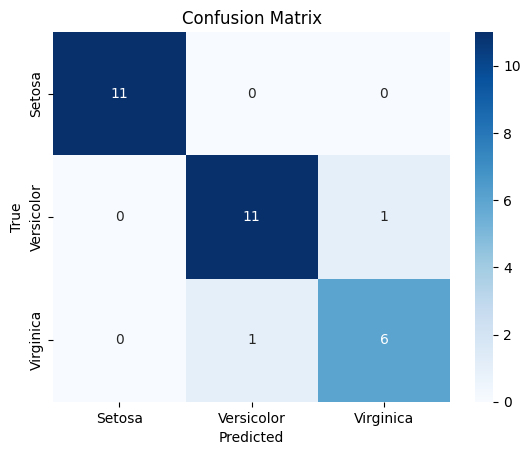

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def visualize_confusion_matrix(cm, class_labels):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

class_labels = ['Setosa', 'Versicolor', 'Virginica']
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
# Confusion matrix'i görselleştir
visualize_confusion_matrix(cm, class_labels)


In [24]:
def olustur_iris():
    try:
        # Kullanıcıdan 4 özelliği al
        sepal_length = float(input("Sepal Uzunluğu: "))
        sepal_width = float(input("Sepal Genişliği: "))
        petal_length = float(input("Petal Uzunluğu: "))
        petal_width = float(input("Petal Genişliği: "))

        # Kullanıcıdan türü al
        tur = input("Çiçeğin Türü (setosa, versicolor, virginica): ")

        # Iris çiçeği örneği oluştur
        _iris = np.array([sepal_length, sepal_width, petal_length, petal_width])

        return tur, _iris
    except ValueError:
        print("Hata: Geçersiz giriş. Lütfen değerleri doğru giriniz.")
        return None
def label_to_numeric(label):
    return {"setosa": 0, "versicolor": 1, "virginica": 2}.get(label, -1)

In [23]:
## tahmin fonksiyonu ile manuel olarak girilen iris çiceği için tahmin yap
def tahmin(clf):
    try:
        # manuel olarak bir Iris çiçeği oluştur
        tur, manuel_iris = olustur_iris()

        if manuel_iris is not None:

            # KNN ile tahmin yapma
            tahmin = clf._predict(manuel_iris.reshape(1, -1))

             # En yakın 5 komşu etiketlerini ekrana yazdırmak amacıyla
            distances = [oklid_uzakligi(manuel_iris, x_train) for x_train in clf.X_train]
            k_indices = np.argsort(distances)[:clf.k]
            k_nearest_labels = [clf.y_train[i] for i in k_indices]


            # Gerçek türü sayısal etikete dönüştürme
            gercek_tur_sayisal = label_to_numeric(tur)
            tahmin_str = {0: "setosa", 1: "versicolor", 2: "virginica"}[tahmin]

           ## print(f"En Yakın 5 Komşu Etiketleri: {k_nearest_labels}")
            # Sonuçları ekrana yazdırma
            print(f"Gerçek Tür: {tur}")
            print(f"KNN Tahmini: {tahmin_str}")

            # Karşılaştırma
            if gercek_tur_sayisal == tahmin:
                print("Sonuçlar eşleşti!")
            else:
                print("Sonuçlar eşleşmedi.")
    except ValueError:
        print("Hata: Geçersiz giriş. Lütfen sayısal değerler girin.")

tahmin(clf)

Sepal Uzunluğu: 1.1
Sepal Genişliği: 1.1
Petal Uzunluğu: 1.1
Petal Genişliği: 1.1
Çiçeğin Türü (setosa, versicolor, virginica): setosa
Gerçek Tür: setosa
KNN Tahmini: setosa
Sonuçlar eşleşti!
